### Real Estate Price Prediction

### Melbourne House Prices


###  Exploratory Data Analysis (EDA)

## Objective
The goal of this notebook is to understand the housing dataset, identify data quality issues,
analyze important patterns, and prepare the data for feature engineering and modeling.

EDA helps in:
- Understanding the structure of the dataset
- Identifying missing values and outliers
- Studying relationships between features and target variable (Price)
- Making informed preprocessing decisions

### 1. Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium


from geopy.distance import geodesic
from sklearn.cluster import KMeans

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)


In [ ]:
!pip install folium
!pip install geopy

### 2. Load Dataset


## Dataset Description
This dataset contains information about residential properties, including:
- Number of rooms
- Property type
- Distance from city center
- Land size and building area
- Number of bathrooms and car spaces

The target variable is **Price**, which represents the sale price of the property.


In [8]:
import pandas as pd
print("Pandas imported successfully")


Pandas imported successfully


In [2]:
import pandas as pd
import os

print("Current folder:", os.getcwd())

df = pd.read_csv("../data/Melbourne_housing_FULL.csv")

print("Data loaded successfully!")
df.head()


Current folder: c:\Users\Zafar Nadeem\Documents\real-estate-price-prediction-project\notebooks
Data loaded successfully!


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### 3.Dataset Overview


In [3]:
df.shape


(34857, 21)

In [4]:

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [5]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [6]:

df.isnull().sum()


Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

### 4.Data Cleaning

Real-world housing data often contains missing values, irrelevant columns,
and inconsistent entries.  
In this section, we clean the dataset to make it suitable for analysis
and machine learning.


### 4.1. Inspect Missing Values

In [7]:
# check numbers of missinh values in each colums
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

BuildingArea     21115
YearBuilt        19306
Landsize         11810
Car               8728
Bathroom          8226
Bedroom2          8217
Lattitude         7976
Longtitude        7976
Price             7610
Regionname           3
CouncilArea          3
Propertycount        3
Distance             1
Postcode             1
Rooms                0
Address              0
Suburb               0
Type                 0
SellerG              0
Date                 0
Method               0
dtype: int64

### 4.2. Drop Irrelevent Columns

In [8]:
# Columns that do not directly help price prediction
columns_to_drop = [
    "Address",    # Exact address is high-cardinality
    "SellerG",    # Seller name not useful
    "Date",       # Sale date not used in this model
    "Postcode"    # Encoded by suburb already
]

df.drop(columns=columns_to_drop, inplace=True, errors="ignore")

df.head()


,Suburb,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,2.5,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,3,u,NaN,VB,2.5,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### 4.3. Seperate Numerical and Categorical Columns

In [9]:
num_cols= df.select_dtypes(include=["int64","float64"]).columns
cat_cols=df.select_dtypes(include=["object"]).columns
print("Numerical columns:", list(num_cols))
print("Categorical columns:", list(cat_cols))


Numerical columns: ['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']
Categorical columns: ['Suburb', 'Type', 'Method', 'CouncilArea', 'Regionname']


### 4.4. Handle Missing Numerical Values

In [10]:
# Numerical → median
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


# Categorical → mode
cat_cols = df.select_dtypes(include=["object"]).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


### 4.5. Select Important Columns

In [11]:
df.columns
df.columns = df.columns.str.strip()
df.columns
print(list(df.columns))

['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']


### 4.6. Verify Cleaning

In [12]:
# Verify no missing values remain
df.isnull().sum()


Suburb           0
Rooms            0
Type             0
Price            0
Method           0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

### 4.7. Remove Duplicate Rows 

In [13]:
# Remove duplicate rows if any
df.drop_duplicates(inplace=True)

print("Remaining rows:", df.shape[0])


Remaining rows: 34454


### 4.8. Basic Sanity Checks

In [14]:
# Ensure no negative values in key columns
df[df["Price"] <= 0]


,Suburb,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [15]:
df = df[df["Price"] > 0]


### 5.Target Variable Analysis


House prices are usually right-skewed, meaning there are a few very expensive properties.
To reduce skewness and stabilize variance, we apply a **log transformation** to the Price variable.

This helps:
- Improve model performance
- Make error distribution more normal
- Reduce the impact of outliers


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

print("All libraries imported successfully")


All libraries imported successfully


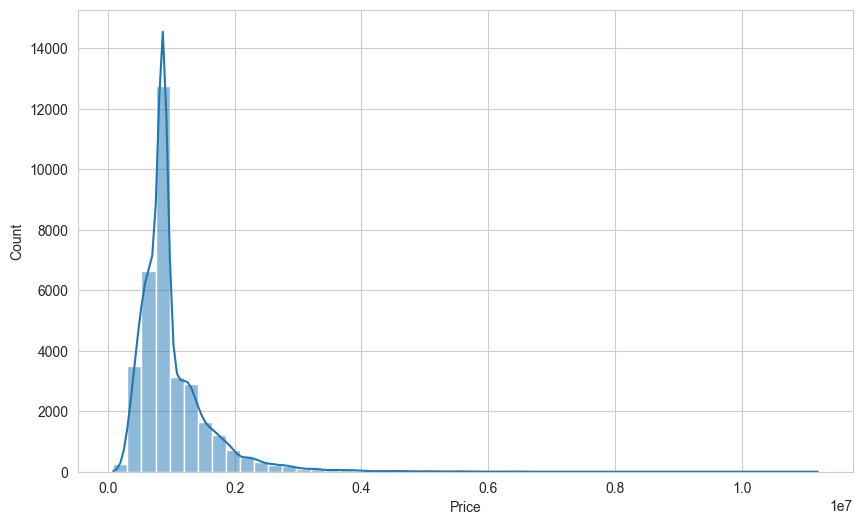

In [19]:
sns.histplot(df["Price"], bins=50, kde=True)
plt.show()

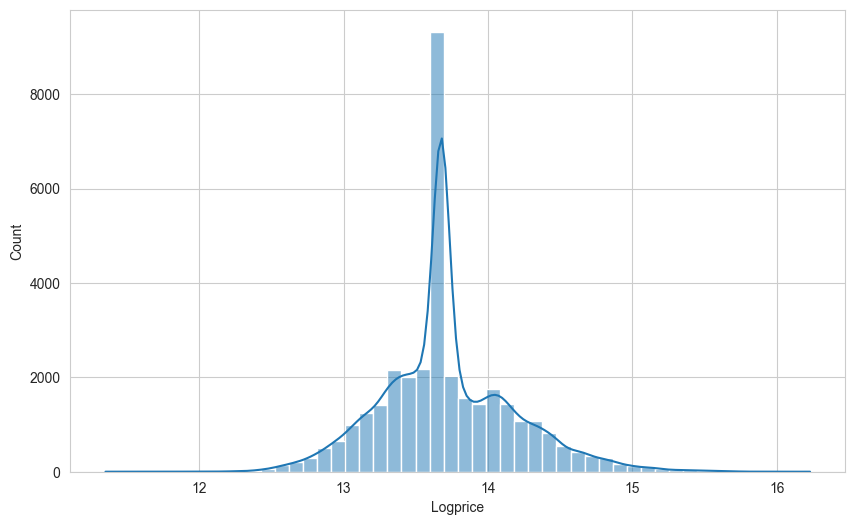

In [20]:
df["Logprice"]=np.log1p(df["Price"])    
sns.histplot(df["Logprice"], bins=50, kde=True)
plt.show()

### 6.Correlation Heatmap

Correlation analysis helps identify:
- Strong predictors of house prices
- Redundant features
- Multicollinearity issues

Highly correlated features with the target variable are usually more useful for prediction.


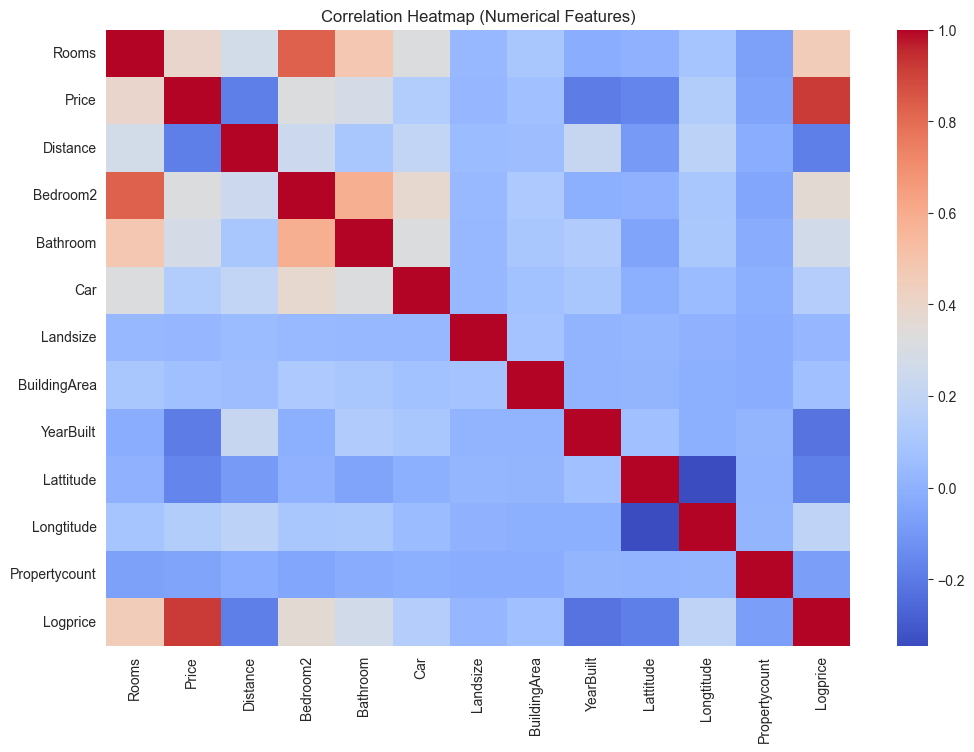

In [21]:
plt.figure(figsize=(12,8))

# Select only numerical columns
numeric_df = df.select_dtypes(include=["int64", "float64"])

sns.heatmap(numeric_df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


### 7. Rooms vs Price

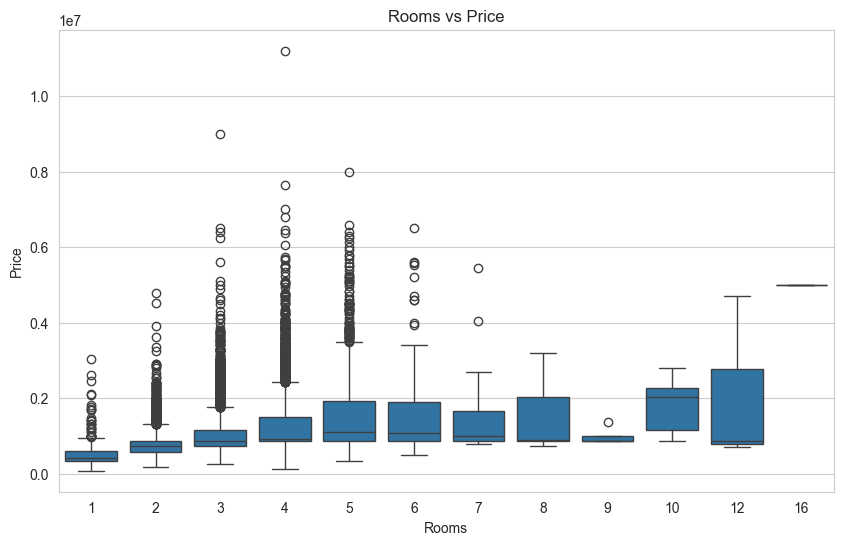

In [22]:
sns.boxplot(x="Rooms", y="Price", data=df)
plt.title("Rooms vs Price")
plt.show()


### GEOSPATIAL ANALYSIS
Geospatial analysis is the process of collecting, modeling, and interpreting data with a geographic component to uncover spatial patterns, trends, and relationships.

### 1.Distance to Melbourne CBD(The Melbourne Central Business District (CBD))


In [23]:
print(df.columns)

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'Distance', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount',
       'Logprice'],
      dtype='object')


In [25]:
from geopy.distance import geodesic


CBD_COORDS = (-37.8136, 144.9631)

df["Distance_to_CBD_km"] = [
    geodesic((lat, lon), CBD_COORDS).km
    for lat, lon in zip(df["Lattitude"], df["Longtitude"])
]

df[["Lattitude", "Longtitude", "Distance_to_CBD_km"]].head()


,Lattitude,Longtitude,Distance_to_CBD_km
0,-37.8014,144.9958,3.182105
1,-37.7996,144.9984,3.475351
2,-37.8079,144.9934,2.742129
3,-37.8114,145.0116,4.277673
4,-37.8093,144.9944,2.797197


### 2. Distance to CBD vs Price

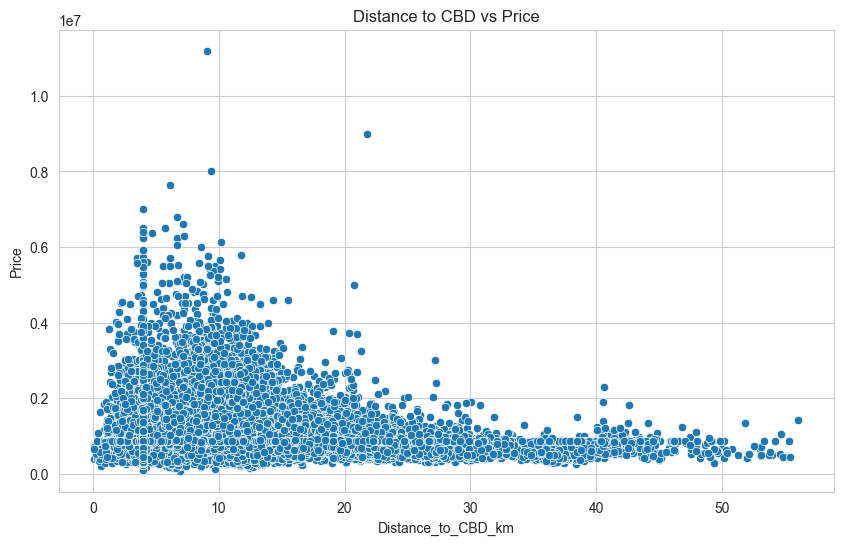

In [26]:
sns.scatterplot(x="Distance_to_CBD_km", y="Price", data=df)
plt.title("Distance to CBD vs Price")
plt.show()


### 3.Interactive Property Map

In [28]:
import folium
melbourne_map = folium.Map(
    location=[-37.8136, 144.9631],
    zoom_start=10
)

for _, row in df.sample(300).iterrows():
    folium.CircleMarker(
        location=[row["Lattitude"], row["Longtitude"]],
        radius=3,
        popup=f"${row['Price']}",
        color="blue",
        fill=True
    ).add_to(melbourne_map)

melbourne_map


### 4.Spatial Clustering

In [30]:
from sklearn.cluster import KMeans

coords = df[["Lattitude", "Longtitude"]]

kmeans = KMeans(n_clusters=6, random_state=42)
df["Location_Cluster"] = kmeans.fit_predict(coords)

df.head()


,Suburb,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Logprice,Distance_to_CBD_km,Location_Cluster
0,Abbotsford,2,h,870000.0,SS,2.5,2.0,1.0,1.0,126.0,136.0,1970.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,13.676250,3.182105,0
1,Abbotsford,2,h,1480000.0,S,2.5,2.0,1.0,1.0,202.0,136.0,1970.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,14.207553,3.475351,0
2,Abbotsford,2,h,1035000.0,S,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,13.849913,2.742129,0
3,Abbotsford,3,u,870000.0,VB,2.5,3.0,2.0,1.0,0.0,136.0,1970.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,13.676250,4.277673,0
4,Abbotsford,3,h,1465000.0,SP,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,14.197366,2.797197,0


### 5.Visualize Clusters

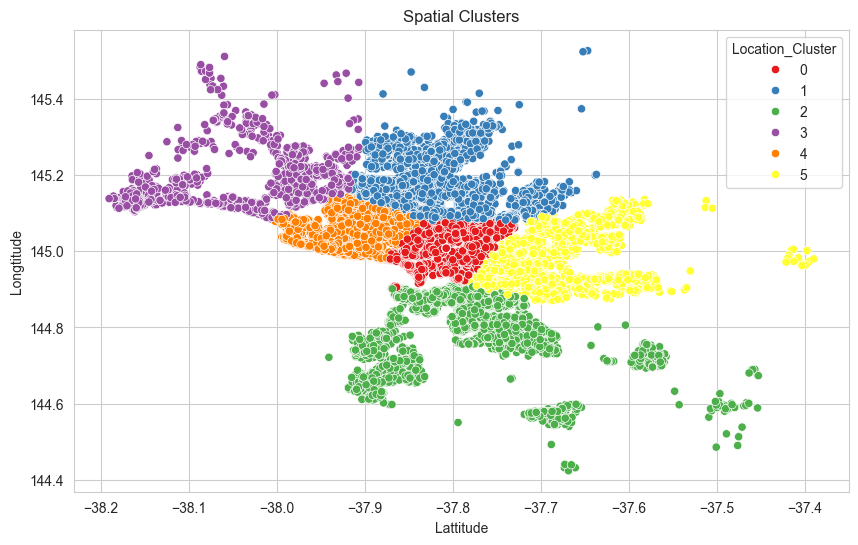

In [31]:
sns.scatterplot(
    x="Lattitude",
    y="Longtitude",
    hue="Location_Cluster",
    palette="Set1",
    data=df
)

plt.title("Spatial Clusters")
plt.show()


### 6.Average Price per Cluster

In [34]:
df.groupby("Location_Cluster")["Price"].mean().sort_values(ascending=False)




Location_Cluster
4    1.255610e+06
1    1.140693e+06
0    1.040788e+06
5    8.282663e+05
3    8.259918e+05
2    8.061031e+05
Name: Price, dtype: float64

### 7.Region-wise Price Analysis

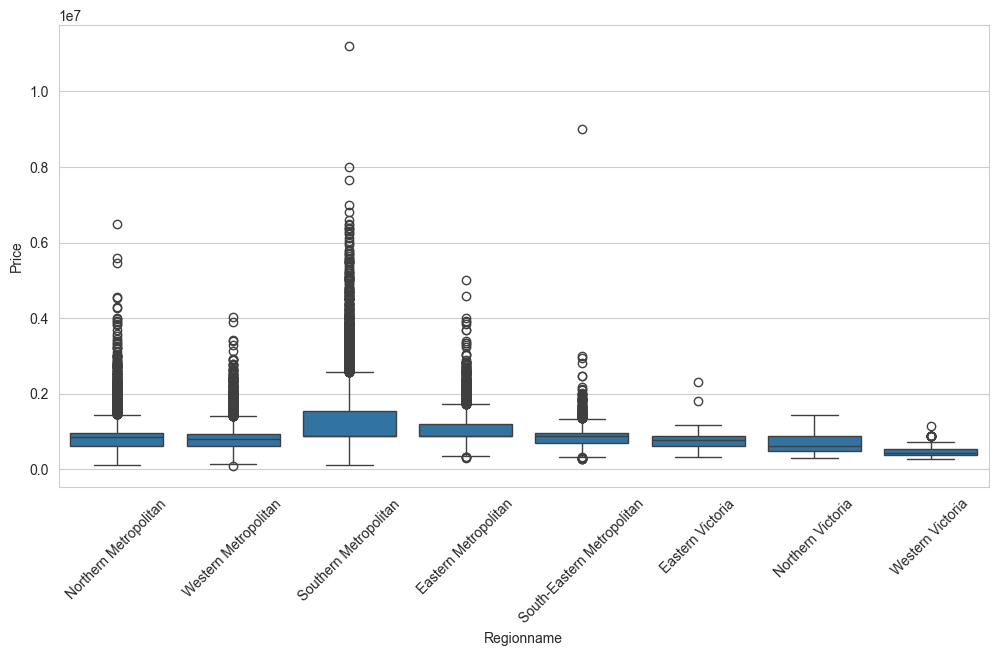

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Regionname", y="Price", data=df)
plt.xticks(rotation=45)
plt.show()
